In [1]:
%pylab inline
import uncertainties
from uncertainties import unumpy as unp
from numpy import array as array

# Daten einlesen
def read (path,offset=2, *kwargs):
    from numpy import array as array
    doc = []
    with open (path+".TKA", 'r') as myfile:
        data = myfile.read().replace(',', '.').replace('\n', ',').replace('  ', ',').replace("\t",",")
        datarray = data.split(',')
        output = []
    for item in datarray:
        if item != '':
            output.append(int(item))
    dataset = array(output[offset:])
    dataset = [array(range(len(dataset))), dataset]
    return dataset

Populating the interactive namespace from numpy and matplotlib


In [2]:
def fit_pm(x, y, func=lambda x: x, p0=None):
    """
        fit_pm takes data points and makes an exponential curve fit. It returns
        the parameters with errors and the coefficient of determination
        Parameters:
        -----------
        x: x-value of the data points.
        y: y-value of the data points.
        func: Function to be fitted to.
        Returns:
        -----------
        list: Gives back a list with the parameters of an expotential function the
              corresponding errors and the coefficient of determination.
    """
    from scipy.optimize import curve_fit
    import numpy as np
    popt, pcov = curve_fit(func, x, y, p0=p0)
    params = popt.copy()
    errors = np.sqrt(np.diag(pcov))
    r = np.array(y) - func(np.array(x), *params)
    rss = np.sum(r ** 2)
    tss = np.sum((y - np.mean(y)) ** 2)
    R_2 = 1 - (rss / tss)
    try:
        from uncertainties import unumpy as unp
        return unp.uarray(params, errors), R_2
    except:
        return np.array(params), np.array(errors), R_2

def linfit_pm(x, y, p0=None):
    return fit_pm(x, y, func=lambda x, a, b,: a * x + b, p0=p0)

def val(x):
    from uncertainties import unumpy
    try:
        return unumpy.nominal_values(x)
    except TypeError:
        return x

def err(x):
    from uncertainties import unumpy
    return unumpy.std_devs(x)

def gaus(x, mu, sigma, A, B):
    import numpy as np
    return B + A * np.e ** ((-1 * (x - mu) ** 2) / (2 * sigma ** 2))

def gausfit_pm(x, y, p0=None):
    import numpy as np
    return fit_pm(x, y, func=lambda x, mu, sigma, A, B: B + A * np.e ** ((-1 * (x - mu) ** 2) / (2 * sigma ** 2)), p0=p0)

In [3]:
data1 = read("UntSp")
data2 = read("UntSp2")
data3 = [data1[0],data1[1]+data2[1]]

In [4]:
errs = [sqrt(item) for item in data3[1]]
data3[1] = unp.uarray(data3[1], errs)
time = 2728+5970
data3[1] = data3[1]/time


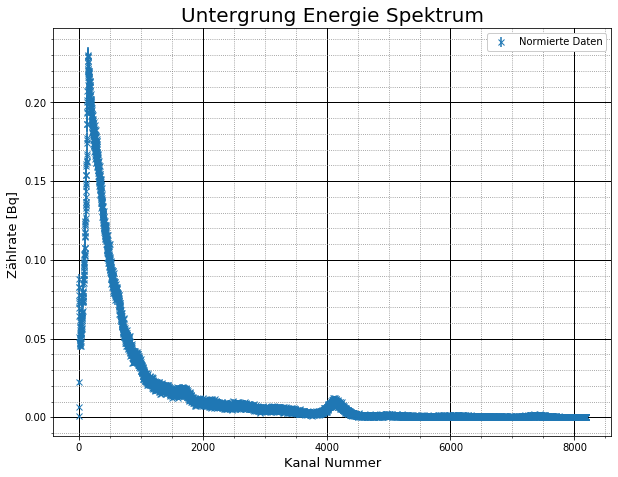

In [5]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

plt.errorbar(data3[0], val(data3[1]),yerr=err(data3[1]), fmt="x", label="Normierte Daten")

###   Label / Title

plt.ylabel(r'Zählrate [Bq] ', fontsize=13)
plt.xlabel(r'Kanal Nummer', fontsize=13)
plt.title('Untergrung Energie Spektrum', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([0,1024])
#axes.set_ylim([0,220000])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(framealpha=1)
plt.savefig('untergrund.png')
plt.show()

In [6]:
untergrund = data3
%store untergrund

Stored 'untergrund' (list)
